# Decodificação de binário para imagem

No código abaixo, o arquivo de saída do Modelsim pode ser renderizada em tempo de simulação.

In [ ]:
from PIL import Image
import numpy as np

def render(hsize, vsize):
    filename = "../../Quartus/software/IntegracaoNios/obj/default/runtime/sim/mentor/imageoutputnios.txt"
    fileout = "Output/imageoutputnios.bmp"

    fileread = open(filename, 'r')

    imgdata = []
    for a in range(vsize):
        linedata = []
        for b in range(0, hsize):
            line = fileread.readline()
            for char in line:
                if(char == "z" or char == "x"):
                    line = "00000000111111110000000000000000"
            linedata.append([int(line[8:16], 2), int(line[16:24], 2), int(line[24:32], 2)])
        imgdata.append(linedata)

    imgdata = np.array(imgdata)
    imgdata = Image.fromarray(imgdata.astype('uint8'))
    imgdata.save(fileout)
    display(imgdata)
    fileread.close()

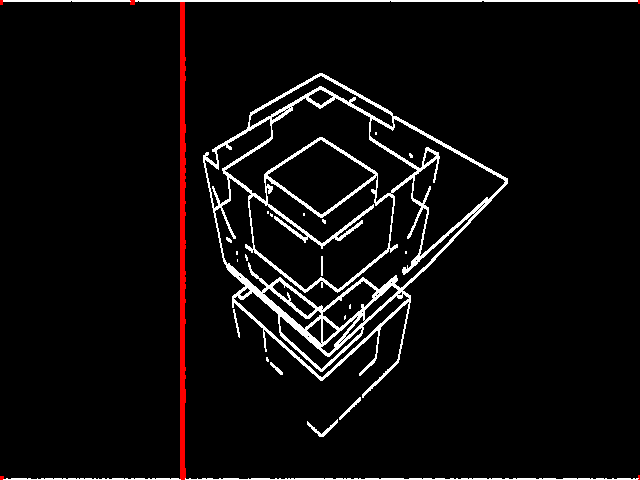

In [208]:
hsize = 640
vsize = 480
render(hsize, vsize)